In [2]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import sys
from scipy.interpolate import CubicSpline

### データ読み込み
1. 可視域, 近赤外1におけるスペクトルの強度が0より大きい


In [3]:
#データセット読み込み
df = pd.read_csv("./data/6864_6868_ref_16nm.csv")
#波長情報が入ったデータセットの読み込み
wav_df = np.array(pd.read_csv("./data/wav.csv")).reshape(-1)

In [15]:
df[(df["latitude"] <= -85)&(df["latitude"] >= -86)][["200", "201"]]

,200,201
6,0.09475,0.08200
7,0.09065,0.07980
8,0.09575,0.08910
9,0.09010,0.07860
10,0.09580,0.08680
11,0.09100,0.08690
12,0.09585,0.08065
13,0.09200,0.07690
14,0.09745,0.08560
15,0.09510,0.08180


In [234]:
def sp_plot(sp_df, wav_df, moving_length = 2, moving_wav = "nir2", save_picture =False):
    index = list(map(str, list(range(296))))
    sp_vis = sp_df[index[:80]]
    wav_vis = wav_df[:80]
    sp_nir1 = sp_df[index[90:184]]
    wav_nir1 = wav_df[90:184]
    #表示する波長帯を変えたい場合は下記の値を変更してください. 
    sp_nir2 = sp_df[index[184:260]]#本来は296まである
    wav_nir2 = wav_df[184:260]
    plt.figure(figsize=[12,8])
    plt.xlabel("nm",size = 20)
    plt.ylabel("%",size = 20)
    plt.title("{}_{}_{:.3f}_{:.3f}".format(sp_df["day"], sp_df["number"], sp_df["latitude"], sp_df["longitude"]), size = 25)
    plt.plot(wav_nir2, sp_nir2, color = "red",label = "nir1")
    plt.plot(wav_nir1 , sp_nir1, color = "green",label = "nir1")
    plt.plot(wav_vis, sp_vis, color='blue', label = "vis")
    
    if moving_length != 0:
        num = moving_length
        b=np.ones(num)/num
        if moving_wav == "nir2":
            moving=np.convolve(sp_nir2, b, mode='same')#近赤外2に対して
            plt.plot(wav_nir2, moving, color = "black",ls = "--", label = "Moving average line")
        elif moving_wav == "nir1":
            moving=np.convolve(sp_nir1, b, mode='same')#近赤外1に対して
            plt.plot(wav_nir1, moving, color = "black",ls = "--", label = "Moving average line")
        elif moving_wav == "vis":
            moving=np.convolve(sp_vis, b, mode='same')#可視域に対して
            plt.plot(wav_vis, moving, color = "black",ls = "--", label = "Moving average line")
        else:
            print("指定したモードは存在しません.")
            sys.exit(0)
    else:
        print("1以上の整数を入力してください.")
        sys.exit(0)
    plt.legend(labelspacing=1.2,prop={'size':15,})
    plt.tick_params(labelsize = 18)
    if save_picture == True:
        plt.savefig("{}_{}_{:.3f}_{:.3f}.jpg".format(sp_df["day"], sp_df["number"], sp_df["latitude"], sp_df["longitude"]))
    plt.show()
               

In [235]:
#緯度経度周回番号の範囲を指定
min_latitude, max_latitude = -85.5, -85.4
min_longitude, max_longitude = 0, 100
min_number, max_number  = 6866, 6867

match_df = df[(df["latitude"]>=min_latitude)&(df["latitude"] <= max_latitude) 
              &(df["longitude"] >= min_longitude)  & (df["longitude"] <= max_longitude)
             &(df["number"] >= min_number)&(df["number"] <=max_number)]
             
match_df.index = range(match_df.shape[0])
print("条件を満たしたスペクトルは{}個です".format(match_df.shape[0]))

条件を満たしたスペクトルは9個です


### ある1つのデータについて見たい場合

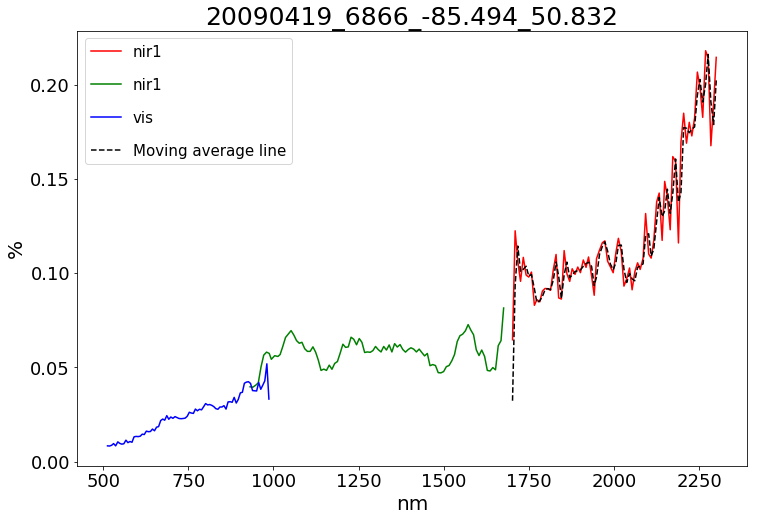

In [237]:
column_number = 0#画像を作成したいデータの行番号を入力してください. 
#移動幅, 移動平均を計算するバンド, 画像を保存するか否かを指定
sp_plot(match_df.iloc[column_number,:], wav_df, moving_length = 2, moving_wav = "nir2", save_picture =False)

### 条件を満たすデータを全ての保存したい場合

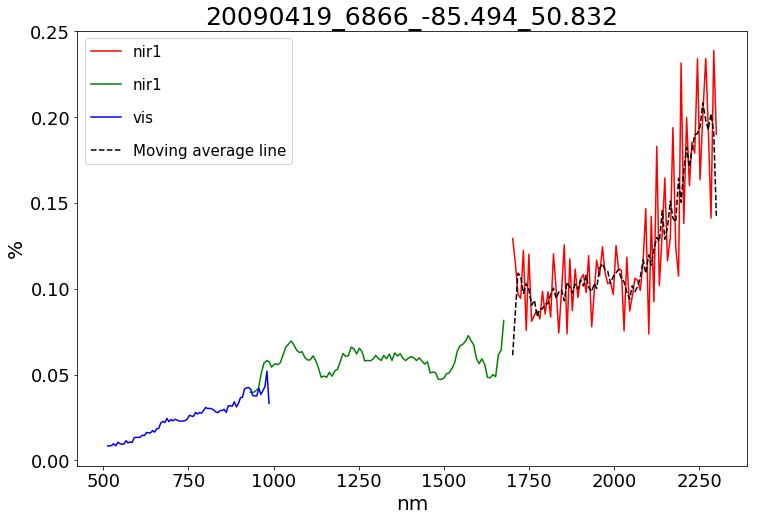

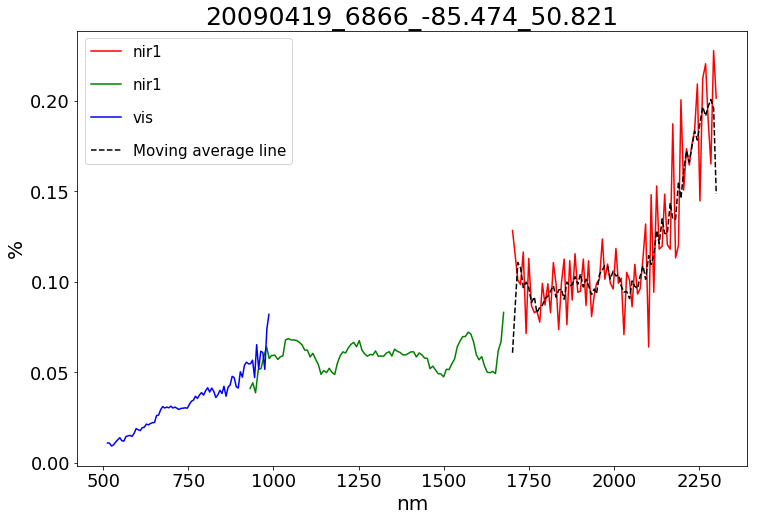

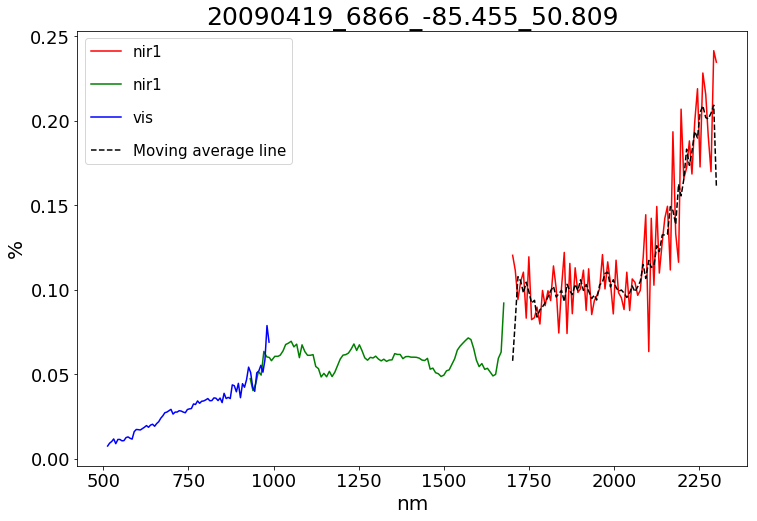

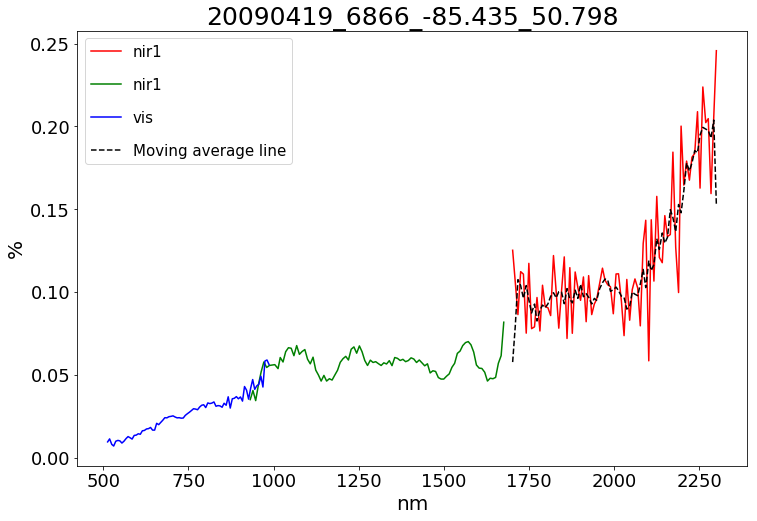

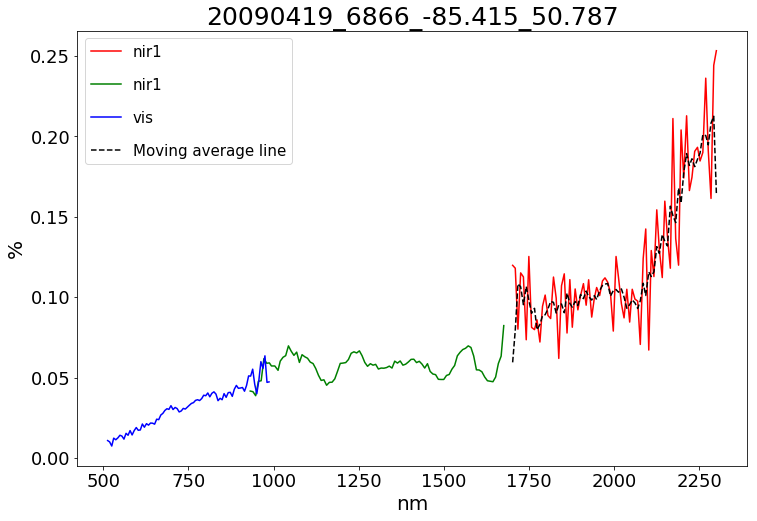

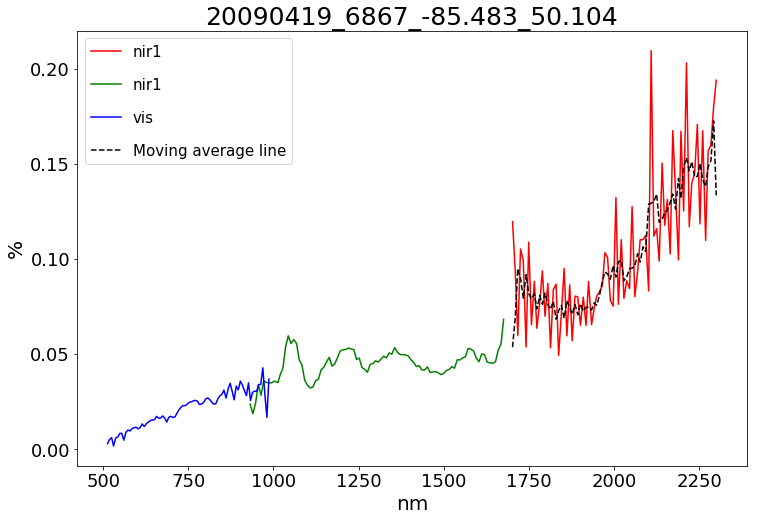

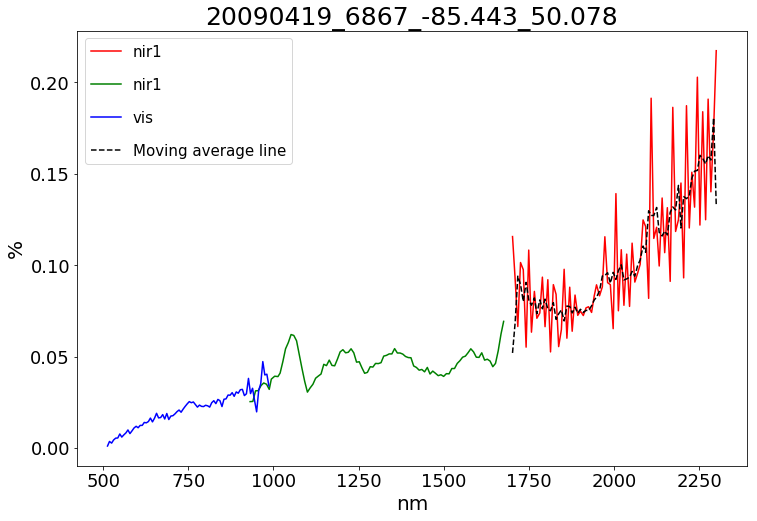

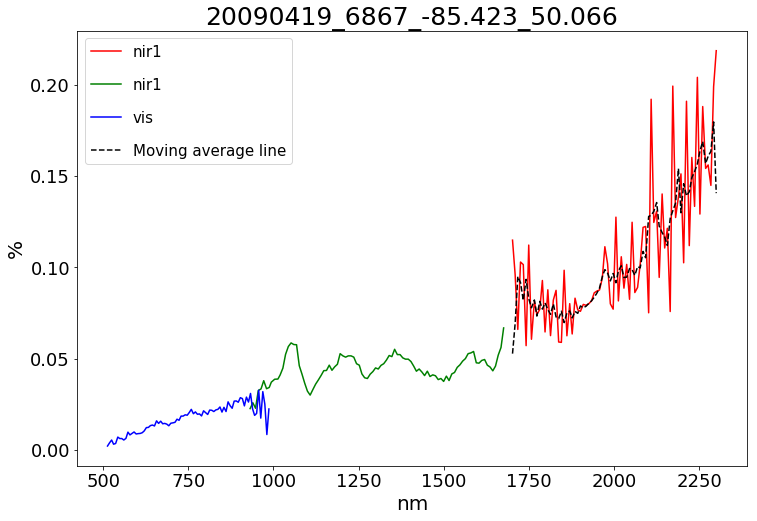

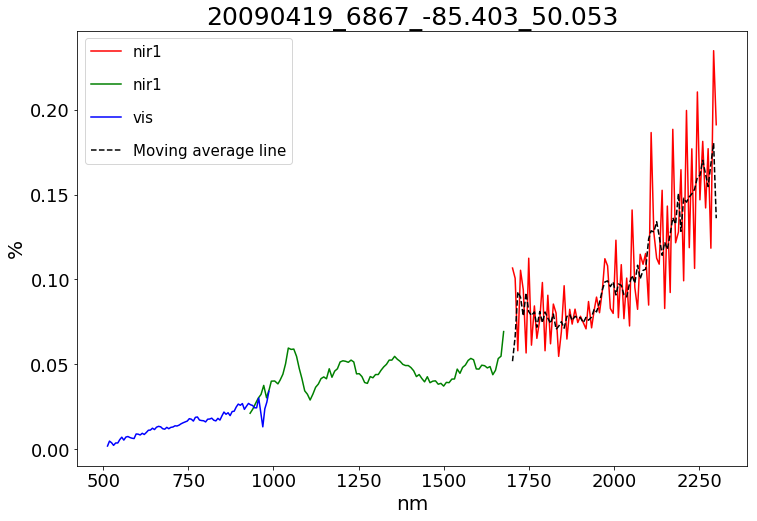

In [194]:
for i in range(match_df.shape[0]):
    sp_plot(match_df.iloc[i,:], wav_df, moving_length = 4, moving_wav = "nir2", save_picture =True)

### 　移動平均の値をcsvファイルとして書き出したい場合

In [222]:
#移動平均を計算して、　計算後の配列を返してくれる関数
def moving_csv(sp_df, moving_length, moving_wav = "nir2"):
    index = list(map(str, list(range(296))))
    sp_vis = sp_df[index[:84]]
    sp_nir1 = sp_df[index[84:184]]
    sp_nir2 = sp_df[index[184:296]]
    num = moving_length
    b=np.ones(num)/num
    if moving_wav == "nir2":
        moving=np.convolve(sp_nir2, b, mode='same')#近赤外2に対して
        sp_df[index[184:296]] = moving
    elif moving_wav == "nir1":
        moving=np.convolve(sp_nir1, b, mode='same')#近赤外1に対して
        sp_df[index[84:184]] = moving
    elif moving_wav == "vis":
        moving=np.convolve(sp_vis, b, mode='same')#可視域に対して
        sp_df[index[84:]] = moving
    else:
        print("指定したモードは存在しません.")
    return sp_df
    
    

In [239]:
ans_list = []
for i in range(df.shape[0]):
    ans_list.append(moving_csv(df.iloc[i], moving_length = 4, moving_wav = "nir2"))
pd.DataFrame(ans_list).to_csv("6864_6868_ref_32nm.csv",index = False)#csvファイルの書き出し

/Users/hk/.pyenv/versions/anaconda3-5.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [1]:
!pwd

/Users/hk/GoogleDrive/water_data/仲内さん
